### Student Name : Rohit Khadka
### Student Id : 8899399

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score



2023-11-18 22:10:58.135364: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-18 22:10:58.238633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with 

In [2]:
from keras.datasets import fashion_mnist

# Loading the dataset from fashion nist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Display dataset information
print("Training set details:")
print(f"Number of images in FMNIST: {train_images.shape[0]}")
print(f"Image dimensions in FMNIST: {train_images.shape[1:]}")
print(f'Labels in FMNIST: {train_labels.shape}')

print(f"Number of classes in FMNIST: {len(np.unique(train_labels))}")


print("\n\nTest set details:")
print(f"Number of images: {test_images.shape}")
print(f"Image dimensions: {test_images.shape}")


Training set details:
Number of images in FMNIST: 60000
Image dimensions in FMNIST: (28, 28)
Labels in FMNIST: (60000,)
Number of classes in FMNIST: 10


Test set details:
Number of images: (10000, 28, 28)
Image dimensions: (10000, 28, 28)


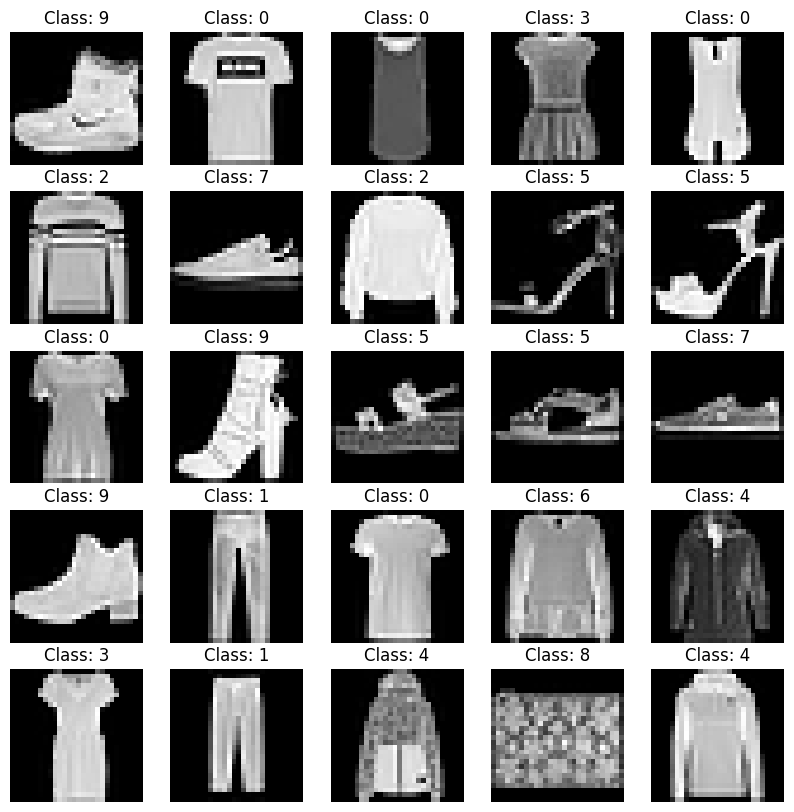

In [4]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Class: {train_labels[i]}")
    plt.axis('off')
plt.show()

Viewing the dataset image in training and testing images

The images for trainin dataset




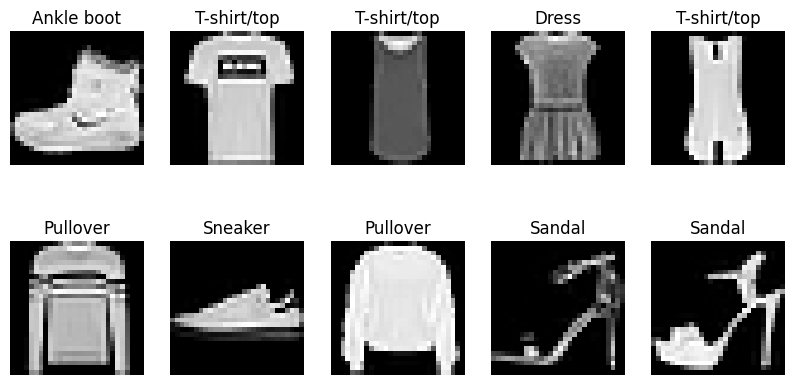

In [5]:
# Displaying a few training images with their labels
cloth_types = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
print("The images for trainin dataset\n\n")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(cloth_types[train_labels[i]])
    plt.axis('off')
plt.show()

The images for testing dataset




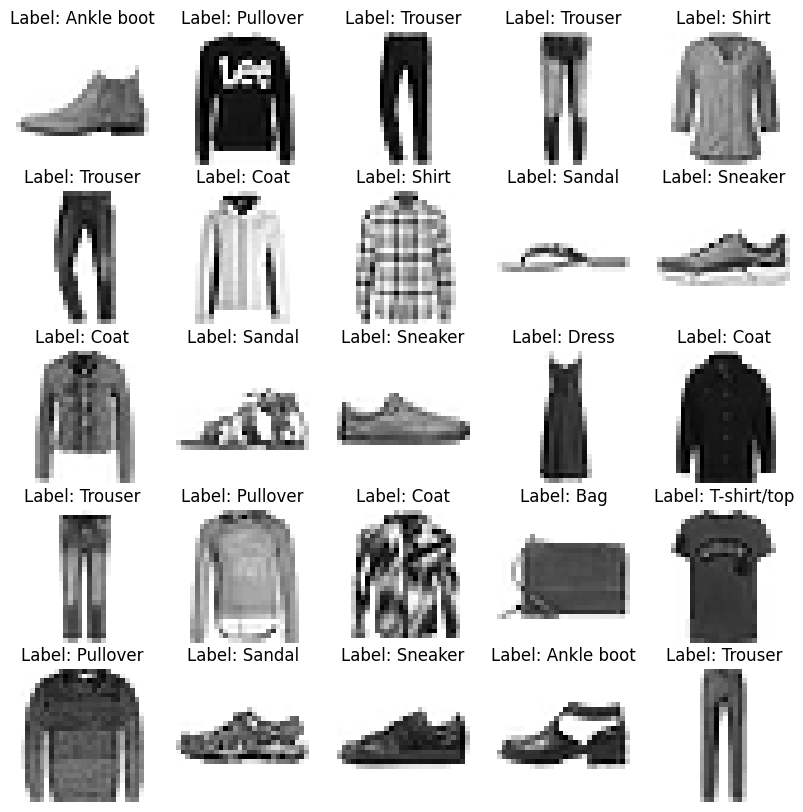

In [6]:
# Test data 

print("The images for testing dataset\n\n")
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='binary') # cmap is cool
    plt.title(f"Label: {cloth_types[test_labels[i]]}")
    plt.axis('off')
plt.show()

### Train a dense neural network using Keras, try out at least three hyperparameters configurations 

### Training a neural network

In [7]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], 28, 28))
test_images_flat = test_images.reshape((test_images.shape[0], 28, 28))

#### The flattening process converts a multi-dimensional array into a one-dimensional array.

In [8]:
# Define a function to create and compile the model
def build_model(units, activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units, activation=activation),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Define a function to train the model
def train_model(model, train_data, train_labels, epochs):
    model.fit(train_data, train_labels, epochs=epochs, batch_size=64)

# Define a function to evaluate the model
def evaluate_model(model, test_data, true_labels):
    predictions = np.argmax(model.predict(test_data), axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy, predictions



In [10]:
# function to display metrics
def display_metrics(confusion_mat, classification_rep, incorrect_indices, test_data_flat, true_labels, predicted_labels):
    class_labels = [str(i) for i in range(10)]

    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nClassification Report:")
    print(classification_rep)

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect_indices[:25]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(test_data_flat[idx], cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}")
        plt.axis('off')
    plt.show()


In [11]:
#function to train and evaluate the model
def train_and_evaluate_model(config):
    model = build_model(config['units'], config['activation'])

    print("\nModel Summary:")
    model.summary()

    train_model(model, train_images, train_labels, epochs=config['epochs'])

    test_accuracy, test_predictions = evaluate_model(model, test_images, test_labels)

    print(f"\nConfiguration: {config}, Test Accuracy: {test_accuracy}")

    confusion_mat = confusion_matrix(test_labels, test_predictions)
    classification_rep = classification_report(test_labels, test_predictions)

    incorrect_indices = np.where(test_predictions != test_labels)[0]

    display_metrics(confusion_mat, classification_rep, incorrect_indices, test_images_flat, test_labels, test_predictions)

    return test_accuracy

In [12]:
# Trying three different hyperparameter configurations for the model
configurations = [
    {'units': 128, 'activation': 'relu', 'epochs': 10},
    {'units': 256, 'activation': 'sigmoid', 'epochs': 10},
    {'units': 64, 'activation': 'tanh', 'epochs': 10}
]



Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5190 - accuracy: 0.8192
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3878 - accuracy: 0.8614
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3483 - accuracy: 0.8738
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3225 - accuracy: 0.8826
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3041 - accuracy: 0.8892
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2908 - accuracy: 0.8933
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2787 - accuracy: 0.8972
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2668 - accuracy: 0.9010
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2556 - accuracy: 0.9051
Epoch 10/10
313/313 [==============================] - 1s 2ms/step

Configuration: {'units': 128, 'a

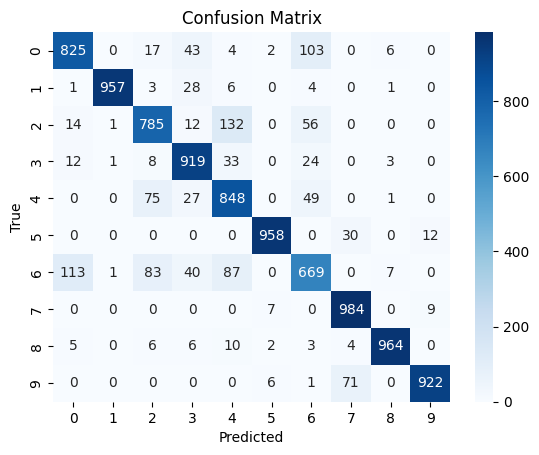


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.85      0.92      0.89      1000
           4       0.76      0.85      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.90      0.98      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



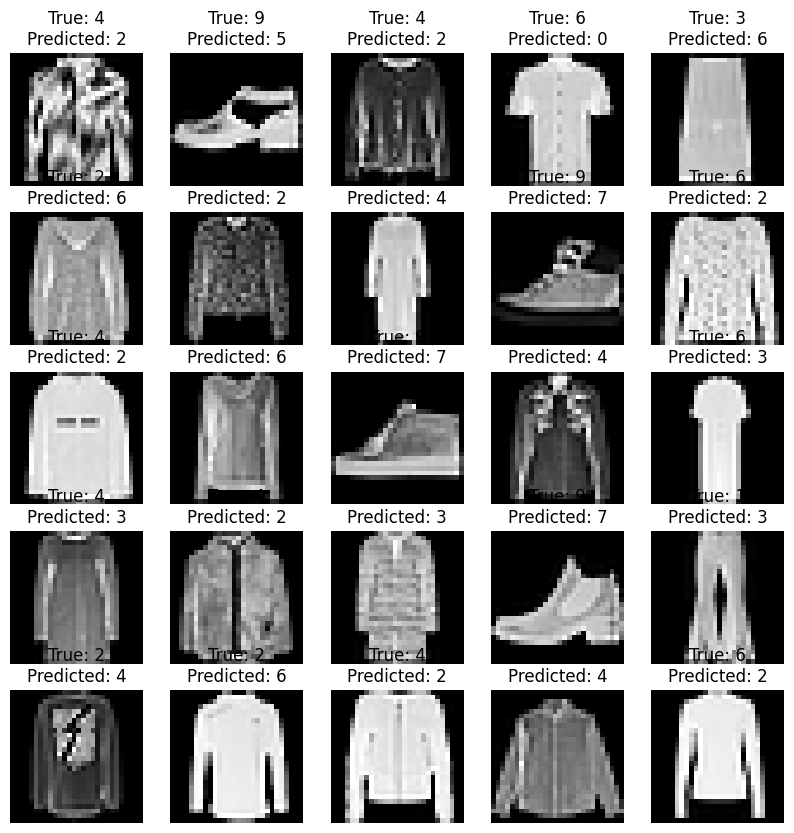


Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5592 - accuracy: 0.8096
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4055 - accuracy: 0.8551
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3689 - accuracy: 0.8

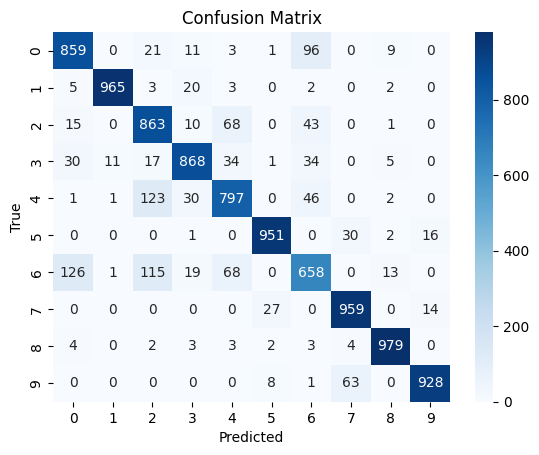


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.86      0.81      1000
           3       0.90      0.87      0.88      1000
           4       0.82      0.80      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.75      0.66      0.70      1000
           7       0.91      0.96      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



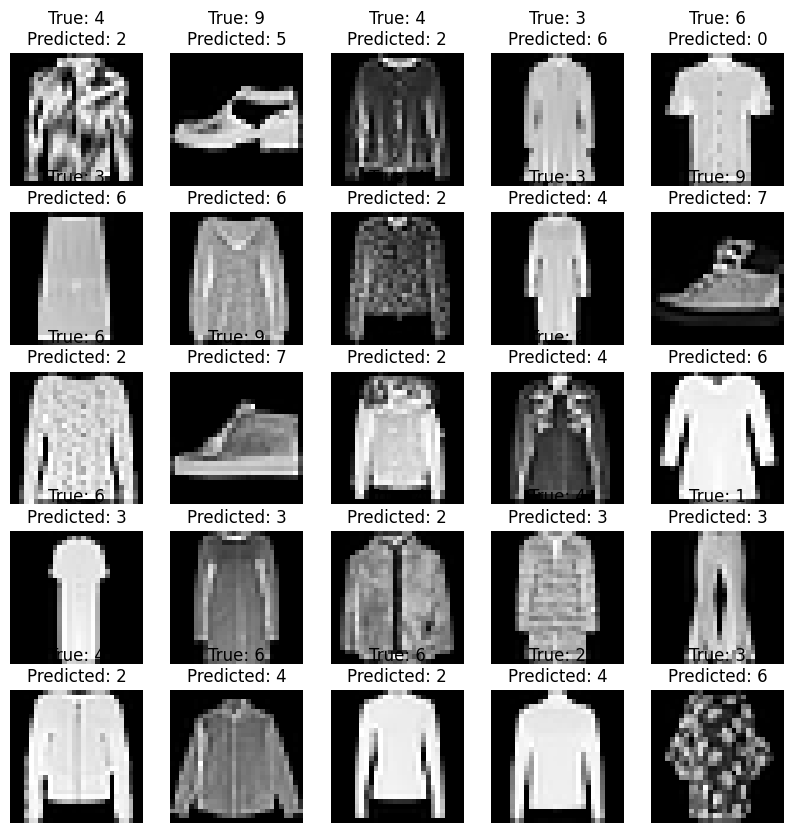


Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5185 - accuracy: 0.8201
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3889 - accuracy: 0.8595
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3554 - accuracy: 0.870

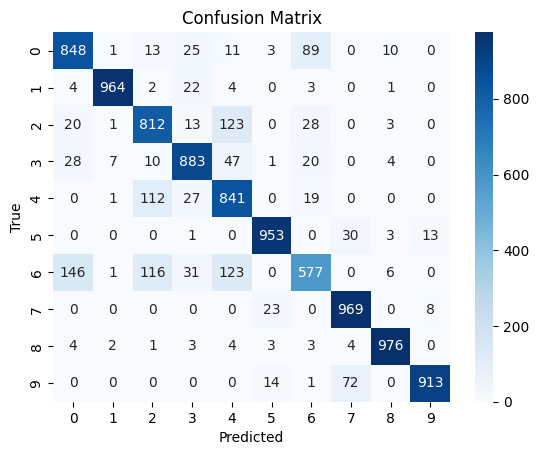


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.81      0.79      1000
           3       0.88      0.88      0.88      1000
           4       0.73      0.84      0.78      1000
           5       0.96      0.95      0.95      1000
           6       0.78      0.58      0.66      1000
           7       0.90      0.97      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



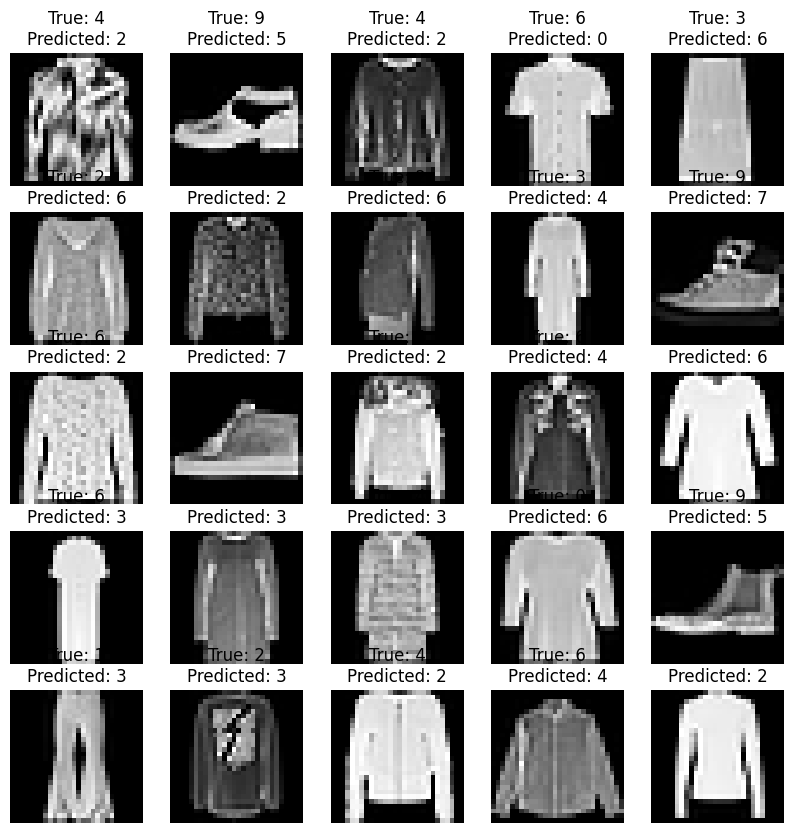

In [13]:

# Use map to apply the function to each configuration
accuracies = list(map(train_and_evaluate_model, configurations))

# Report the best configuration
best_config = configurations[np.argmax(accuracies)]
best_accuracy = max(accuracies)

In [14]:
print("\nBest Configuration:")
print(f"Configuration: {best_config}, Best Test Accuracy: {best_accuracy}")



Best Configuration:
Configuration: {'units': 128, 'activation': 'relu', 'epochs': 10}, Best Test Accuracy: 0.8831


#### First configuration with relu activation gave the best accuracy with 0.9079 training accuracy and 0.8831 test accuracy just slighthly better than other for the same 10 epochs each.